In [19]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [20]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path = os.getenv('HOME')+'/aiffel/ocr_python/pic5.png'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

-rw-r--r-- 1 root root 2323 Feb 23 23:53 /aiffel/aiffel/ocr_python/my_google_api_key.json
Texts:

"야로슬라블' 코스트로마,
ЯрославльКострома
프스코프
타르투
리빈스크
Рыбинск
Псков
Tartu
리가
이바노보
Иваново
최니즈니 노브
고로드
Rīga
라트비아
트베리
Нижний
Тверь
Новгород
'블라디미르,
Владимир
모스크바:
Москва
체르진스크
Дзержинск
아니아.
빌니우스,
Vilnius
비테프스크,
Bіцебск
아르자마스
Арзамас
스몰렌스크
Смоленск
포돌스크
Подольск
랴잔
Рязань
칼루가
Калуга
'민스크
툴라
Тула
모길료프)
Mariлey
Мінск
브란스크
Брянск
벨라루스
오를
Орёл
탐보프
Тамбов
리페크
Липецк.
Гомель
CT
'쿠르스크
Курск
보로네슈
Воронеж
제르니히우
Чернігів
早杰三
Луцьк 2ч
Pівне
수미
Суми
키예프
Київ
Белгород
지토미르
Житомир
하르키우
Харків.
:빌라 트세,
폴타바
Полтава
Біла Церква
테르노필
Тернопіль
빈니차
Bінниця
제르카시
Черкаси
вськ
크레멘주크
Кременчук
드네프로
페트로프스크.
루한시크/
Луганськ»
제르니우지
Черніяц
"

"야로"

"슬라"

"블"

"'"

"코스트"

"로마"

","

"ЯрославльКострома"

"프"

"스코프"

"타르"

"투"

"리빈"

"스크"

"Рыбинск"

"Псков"

"Tartu"

"리가"

"이바노"

"보"

"Иваново"

"최"

"니즈니"

"노브"

"고"

"로드"

"Rīga"

"라트비아"

"트"

"베리"

"Нижний"

"Тверь"

"Новгород"

"'"

"블라디미르"

","

"Владимир"

"모스크바"

":"

"

In [12]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [13]:
import string

In [14]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
#image_urls = [
#  'https://source.unsplash.com/M7mu6jXlcns/640x460',
#  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
#  'https://source.unsplash.com/98uYQ-KupiE',
#  'https://source.unsplash.com/j9JoYpaJH3A',
#  'https://source.unsplash.com/eBkEJ9cH5b4'
#]
path1 = os.getenv('HOME')+'/aiffel/ocr_python/pic66.jpg'
image_urls = [
    path,path1
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

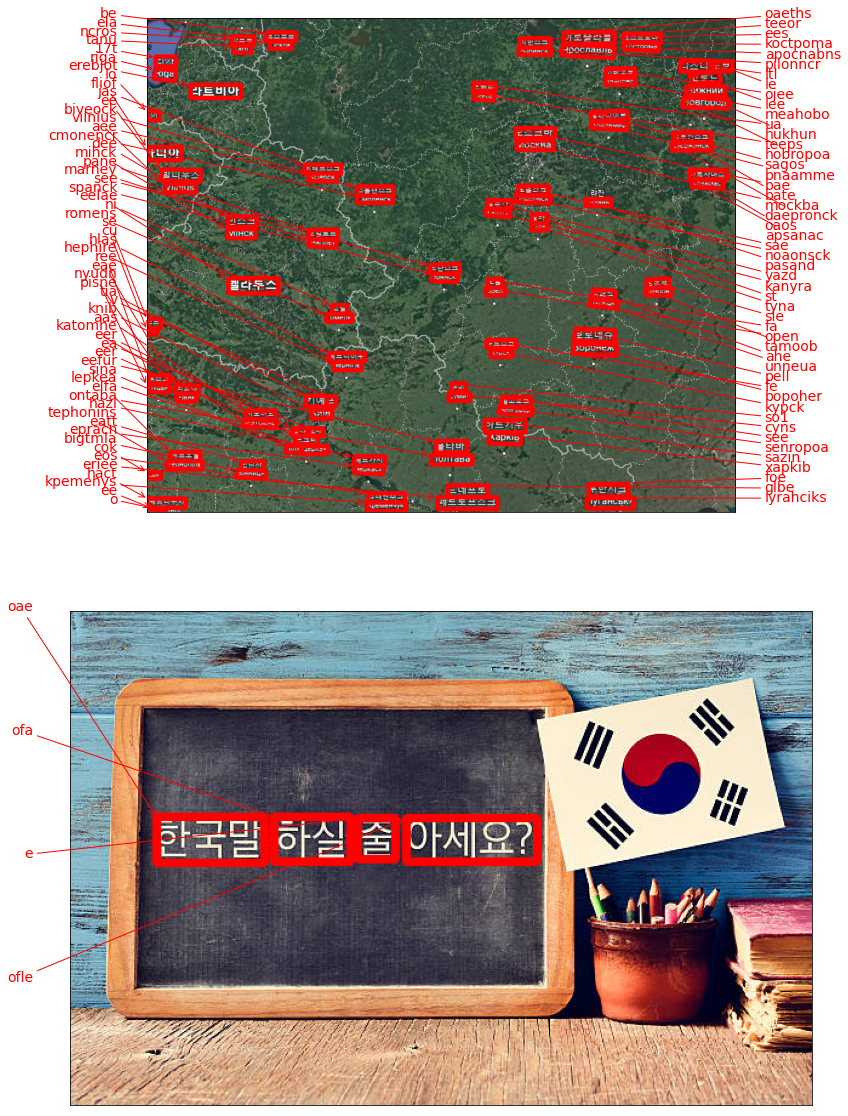

In [15]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [16]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/pic5.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png
/aiffel/aiffel/ocr_python/0025.png
/aiffel/aiffel/ocr_python/0026.png
/aiffel/aiffel/ocr_python/0027.png
/aiffel/aiffel/ocr_p

In [18]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

아로둘라를 코

수   내"

[(스 주 3

이



구비 12 00000 수로요 오아스

어우 그은 추누이 일사 오020

1 변수 애니 일      개          내구 부드 오디],


2 지고 사6   ; 6. , 때 1    0) 주    (수지  토제



아기 새라다1 으으니 으[20000오아사이

속어

들 ^“

기이 오게


7 706


티지

나. 1 이 1 1


[더

도.



때

6 그나 아이 [채거

겨

,

더

1

은

역

도 1 1. 8

빌니우스

1 (나나 이

이 소이다 가 배게 아이오 드디 02 06 1오00


이 개가 은 20아아태로도 하기 가아 은으나보<. 해 0

보 ㆍ,



스폴댄스크

에 100 [그오해

~

하드

“/

|우

이기 이터는

은 느0

쑤새그80 ~

죽통


Done


# 프로젝트

# 1. OCR 활용 구현하려는 서비스 기획

인식한 문자 그대로 들고와서 

# 2. 모델 평가기준

1. 영어와 한글 포함한 이미지에 대해 85% 정확도
2. 데이터셋은 포장지 유통기한

# 3. 테스트 결과

In [21]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [22]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path = os.getenv('HOME')+'/aiffel/ocr_python/pic.png'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.


-rw-r--r-- 1 root root 2323 Feb 23 23:53 /aiffel/aiffel/ocr_python/my_google_api_key.json


In [26]:
import glob
file_list = glob.glob(os.getenv('HOME')+'/aiffel/ocr_python/time*.jpg')

In [28]:
result = [detect_text(i) for i in file_list]

Texts:

"제조번호 : 9002
유통기한 : 2021.04.22 까지
"

"제조"

"번호"

":"

"9002"

"유통"

"기한"

":"

"2021.04.22"

"까지"
bounds: (317,54),(375,54),(375,88),(317,88)
Texts:

"달걀' 유통기한 고무줄?
원산지: 미국
내용량 30개입(1,740g)
KBS1
9 제조실자:
유통치한:
2017.01.12
201702.25
까지
01719 666905"
"

"달걀"

"'"

"유통"

"기한"

"고무줄"

"?"

"원산지"

":"

"미국"

"내용량"

"30"

"개입"

"("

"1,740g"

")"

"KBS1"

"9"

"제조"

"실자"

":"

"유통"

"치한"

":"

"2017.01.12"

"201702.25"

"까지"

"01719"

"666905""
bounds: (521,378),(634,346),(643,379),(530,411)
Texts:

"2021.08.20 15:59까지
21.01.26
부터
21:07.25T 까지
유통
기한
2022.04.07A.
까지
"

"2021.08.20"

"15:59"

"까지"

"21.01.26"

"부터"

"21"

":"

"07.25T"

"까지"

"유통"

"기한"

"2022.04.07A."

"까지"
bounds: (480,293),(535,291),(536,320),(481,322)
Texts:

"우통기한:
2012.02.29
"

"우통"

"기한"

":"

"2012.02.29"
bounds: (118,86),(210,100),(207,121),(115,108)
Texts:

"유통기한 까지
2021.12.02
142246KVS4
들어주세요
흔들어드세요
스트로
"

"유통"

"기한"

"까지"

"2021.12.02"

"142246KVS4"

"들어"

"주세요"

"흔들어"

"드세요"

"스트로"
bounds: (415,123),(414,166

# 실험종료

사실 한국어 등 다른 언어가 들어가는 Task를 진행한 순간 비교는 무의미해졌다  
구글 api를 활용한 성능이 압도적으로 높을 뿐더러 여러 언어와의 사용성도 뛰어나서 사용하기 효과적이었고, 시간 또한 빠르게 동작하였다  
물론 비용이 들어가는 것이기 때문에 막 사용할 수는 없을 것이며, 특히  
서비스로서 활용하려면 과금이 들어가기 때문에 부가가치가 높은 일을 해야만 할 것이다  
keras_ocr의 경우 api 활용은 편리했으나, 모델의 학습 및 finetuning 측면에서 사용하기가 다소 어려웠으며 가이드 문서또한 부실하여 제대로 활용하기 어려웠다  
테서렉트의 경우도 언어가 섞일 경우 사용하기가 어려워 보여서 다양한 언어를 학습한 모델을 불러와서 finetuning하는 방법을 써보고 싶다